In [1]:
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# import libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# read ratings file
ratings = pd.read_csv('data/ratings.csv')

In [4]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
ratings.tail()

,userId,movieId,rating,timestamp
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352
100835,610,170875,3.0,1493846415


In [6]:
ratings.shape

(100836, 4)

In [7]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


### Train-test split

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(ratings, test_size = 0.30, random_state = 42)

print(X_train.shape)
print(X_test.shape)

(70585, 4)
(30251, 4)


In [9]:
# pivot ratings into movie features
user_data = X_train.pivot(index = 'userId', columns = 'movieId', values = 'rating').fillna(0)
user_data.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,190221,191005,193565,193571,193573,193579,193581,193583,193585,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# make a copy of train and test datasets
dummy_train = X_train.copy()
dummy_test = X_test.copy()

dummy_train['rating'] = dummy_train['rating'].apply(lambda x: 0 if x > 0 else 1)
dummy_test['rating'] = dummy_test['rating'].apply(lambda x: 1 if x > 0 else 0)

In [11]:
# The movies not rated by user is marked as 1 for prediction 
dummy_train = dummy_train.pivot(index = 'userId', columns = 'movieId', values = 'rating').fillna(1)

# The movies not rated by user is marked as 0 for evaluation 
dummy_test = dummy_test.pivot(index ='userId', columns = 'movieId', values = 'rating').fillna(0)

In [12]:
dummy_train.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,190221,191005,193565,193571,193573,193579,193581,193583,193585,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [13]:
dummy_test.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,187595,189043,189111,189333,189547,189713,190213,190219,193567,193587
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### User-User Similarity matrix

#### Using Cosine similarity

In [14]:
from sklearn.metrics.pairwise import cosine_similarity

# User Similarity Matrix using Cosine similarity as a similarity measure between Users
user_similarity = cosine_similarity(user_data)
user_similarity[np.isnan(user_similarity)] = 0
print(user_similarity)
print(user_similarity.shape)

[[1.         0.01799262 0.02914591 ... 0.22586534 0.12184689 0.13241346]
 [0.01799262 1.         0.         ... 0.04299081 0.03472882 0.0625667 ]
 [0.02914591 0.         1.         ... 0.00378273 0.         0.02382229]
 ...
 [0.22586534 0.04299081 0.00378273 ... 1.         0.10982639 0.21962266]
 [0.12184689 0.03472882 0.         ... 0.10982639 1.         0.05416081]
 [0.13241346 0.0625667  0.02382229 ... 0.21962266 0.05416081 1.        ]]
(610, 610)


###  Predicting the User ratings on the movies 

In [15]:
user_predicted_ratings = np.dot(user_similarity, user_data)
user_predicted_ratings

array([[8.52008912e+01, 3.99290227e+01, 2.08165173e+01, ...,
        2.81820351e-02, 2.81820351e-02, 1.57425084e-01],
       [2.45531356e+01, 1.05987273e+01, 2.94172315e+00, ...,
        8.74389309e-02, 8.74389309e-02, 4.49741734e-01],
       [4.22670774e+00, 2.11463396e+00, 9.59320674e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [9.49265311e+01, 4.92867089e+01, 2.12555470e+01, ...,
        2.51644930e-02, 2.51644930e-02, 5.92666313e-01],
       [7.50962548e+01, 3.56578151e+01, 1.17138113e+01, ...,
        0.00000000e+00, 0.00000000e+00, 6.43083908e-02],
       [7.67153155e+01, 3.67625117e+01, 1.11564580e+01, ...,
        2.61466866e-01, 2.61466866e-01, 8.03583319e-01]])

In [16]:
user_predicted_ratings.shape

(610, 8566)

In [17]:
# np.multiply for cell-by-cell multiplication 

user_final_ratings = np.multiply(user_predicted_ratings, dummy_train)
user_final_ratings.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,190221,191005,193565,193571,193573,193579,193581,193583,193585,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,0.000000,39.929023,0.000000,1.220732,10.483532,0.000000,14.082187,2.605186,4.111435,47.981999,...,0.083324,0.036234,0.028182,0.032208,0.032208,0.028182,0.032208,0.028182,0.028182,0.157425
2,24.553136,10.598727,2.941723,0.085473,2.773060,10.458197,2.308815,0.523106,0.588578,11.698251,...,0.054182,0.112421,0.087439,0.099930,0.099930,0.087439,0.099930,0.087439,0.087439,0.449742
3,4.226708,2.114634,0.959321,0.066644,0.308448,2.855740,0.518991,0.105484,0.190006,2.550762,...,0.008707,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,50.832807,23.786786,9.793001,0.706291,6.609481,24.594138,10.881808,1.505819,2.196956,27.970658,...,0.005910,0.065396,0.050864,0.058130,0.058130,0.050864,0.058130,0.050864,0.050864,0.106328
5,60.794262,36.875980,12.358414,2.321889,13.215004,29.323176,14.149193,3.043103,2.351687,47.983608,...,0.108995,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.103332


### Top 5 movie recommendations for the User 42

In [18]:
user_final_ratings.iloc[42].sort_values(ascending = False)[0:5]

movieId
480    87.452973
150    86.994790
457    81.930003
593    80.807548
1      61.416804
Name: 43, dtype: float64

## Item-based collaborative filtering

In [19]:
movie_features = X_train.pivot(index = 'movieId', columns = 'userId', values = 'rating').fillna(0)
movie_features.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,0.0,0.0,4.5,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,4.0,2.5,0.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


### Item-Item Similarity matrix

#### Using Cosine similarity

In [20]:
from sklearn.metrics.pairwise import cosine_similarity

# Item Similarity Matrix using Cosine similarity as a similarity measure between Items
item_similarity = cosine_similarity(movie_features)
item_similarity[np.isnan(item_similarity)] = 0
print(item_similarity)
print("- "*10)
print(item_similarity.shape)

[[1.         0.3250275  0.20868811 ... 0.         0.         0.        ]
 [0.3250275  1.         0.16373912 ... 0.         0.         0.        ]
 [0.20868811 0.16373912 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         1.         0.        ]
 [0.         0.         0.         ... 1.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]
- - - - - - - - - - 
(8566, 8566)


### Predicting the User ratings on the movies 

In [21]:
item_predicted_ratings = np.dot(movie_features.T, item_similarity)
item_predicted_ratings

array([[1.70457674e+02, 1.45736065e+02, 1.43879168e+02, ...,
        4.90965204e-01, 4.90965204e-01, 2.29232951e+00],
       [1.47046553e+01, 1.27977597e+01, 7.41114463e+00, ...,
        4.11059622e-01, 4.11059622e-01, 2.92895445e+00],
       [4.64495934e+00, 3.92745275e+00, 3.15259091e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [3.43701501e+02, 3.24195971e+02, 2.65563257e+02, ...,
        1.03906576e+00, 1.03906576e+00, 1.84582165e+01],
       [2.59031967e+01, 2.12250531e+01, 1.32545528e+01, ...,
        0.00000000e+00, 0.00000000e+00, 3.54245954e-01],
       [5.33648012e+02, 4.18264714e+02, 2.11408804e+02, ...,
        1.91118832e+01, 1.91118832e+01, 3.78219746e+01]])

In [22]:
item_predicted_ratings.shape

(610, 8566)

In [23]:
dummy_train.shape

(610, 8566)

#### Filtering the ratings only for the movies not already rated by the user for recommendation

In [24]:
# np.multiply for cell-by-cell multiplication 

item_final_ratings = np.multiply(item_predicted_ratings, dummy_train)
item_final_ratings.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,190221,191005,193565,193571,193573,193579,193581,193583,193585,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,0.000000,145.736065,0.000000,17.752252,60.018339,0.000000,64.555580,56.220407,28.999703,143.817617,...,1.537469,0.490965,0.490965,0.490965,0.490965,0.490965,0.490965,0.490965,0.490965,2.292330
2,14.704655,12.797760,7.411145,0.269430,5.804070,10.243947,3.230076,4.735767,1.599833,10.960730,...,0.461311,0.411060,0.411060,0.411060,0.411060,0.411060,0.411060,0.411060,0.411060,2.928954
3,4.644959,3.927453,3.152591,0.227362,0.903036,4.159893,1.724414,0.864785,1.312176,4.381157,...,0.047166,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,82.099482,70.871325,49.487513,10.082054,34.732576,65.274992,41.705394,29.677329,12.913699,70.165084,...,0.069251,0.629317,0.629317,0.629317,0.629317,0.629317,0.629317,0.629317,0.629317,1.033695
5,29.845750,30.143357,18.279888,9.367018,17.505036,23.594082,17.286535,13.692940,5.029116,31.156561,...,0.694836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.537539


### Top 5 movie recommendations for the User 42

In [25]:
item_final_ratings.iloc[42].sort_values(ascending = False)[0:5]

movieId
480    88.928798
457    78.872510
2      78.342161
150    74.121047
185    72.608642
Name: 43, dtype: float64

### Using User-User similarity 

In [26]:
test_user_features = X_test.pivot(index = 'userId', columns = 'movieId', values = 'rating').fillna(0)
test_user_similarity = cosine_similarity(test_user_features)
test_user_similarity[np.isnan(test_user_similarity)] = 0

print(test_user_similarity)
print("- "*10)
print(test_user_similarity.shape)

[[1.         0.         0.07126637 ... 0.0749648  0.         0.02105064]
 [0.         1.         0.         ... 0.02631254 0.         0.04691426]
 [0.07126637 0.         1.         ... 0.         0.         0.        ]
 ...
 [0.0749648  0.02631254 0.         ... 1.         0.06079015 0.12466251]
 [0.         0.         0.         ... 0.06079015 1.         0.02233952]
 [0.02105064 0.04691426 0.         ... 0.12466251 0.02233952 1.        ]]
- - - - - - - - - - 
(610, 610)


In [27]:
user_predicted_ratings_test = np.dot(test_user_similarity, test_user_features)
user_predicted_ratings_test

array([[ 8.01521825,  3.22701218,  1.71422693, ...,  0.04154912,
         0.        ,  0.        ],
       [ 1.64920152,  0.91304857,  0.02113666, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.07587801,  0.07241296,  0.1867716 , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [17.86102484, 10.1363879 ,  4.48304633, ...,  0.0274908 ,
         0.        ,  0.        ],
       [ 3.10351661,  2.6934212 ,  1.20357903, ...,  0.        ,
         0.        ,  0.        ],
       [12.36110509,  5.79632466,  1.96280959, ...,  0.        ,
         0.20526264,  0.23947308]])

### Testing on the movies already rated by the user

In [28]:
test_user_final_rating = np.multiply(user_predicted_ratings_test, dummy_test)
test_user_final_rating.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,187595,189043,189111,189333,189547,189713,190213,190219,193567,193587
userId,,,,,,,,,,,,,,,,,,,,,
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,28.077679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
ratings['rating'].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

But we need to normalize the final rating values between range (0.5, 5)

In [30]:
from sklearn.preprocessing import MinMaxScaler

X = test_user_final_rating.copy() 
X = X[X > 0] # only consider non-zero values as 0 means the user haven't rated the movies

scaler = MinMaxScaler(feature_range = (0.5, 5))
scaler.fit(X)
pred = scaler.transform(X)

print(pred)

[[       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 ...
 [       nan 2.28631493        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]]


In [31]:
# total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(pred))
total_non_nan

30251

In [32]:
test = X_test.pivot(index = 'userId', columns = 'movieId', values = 'rating')
test.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,187595,189043,189111,189333,189547,189713,190213,190219,193567,193587
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
# RMSE Score

diff_sqr_matrix = (test - pred)**2
sum_of_squares_err = diff_sqr_matrix.sum().sum() # df.sum().sum() by default ignores null values

rmse = np.sqrt(sum_of_squares_err/total_non_nan)
print(rmse)

1.5636288511022254


In [34]:
# Mean abslute error

mae = np.abs(pred - test).sum().sum()/total_non_nan
print(mae)

1.2116011629065675


### Using Item-Item Similarity 

In [35]:
test_item_features = X_test.pivot(index = 'movieId', columns = 'userId', values = 'rating').fillna(0)
test_item_similarity = cosine_similarity(test_item_features)
test_item_similarity[np.isnan(test_item_similarity)] = 0 

print(test_item_similarity)
print("- "*10)
print(test_item_similarity.shape)

[[1.         0.15732306 0.09932171 ... 0.         0.         0.        ]
 [0.15732306 1.         0.         ... 0.         0.         0.        ]
 [0.09932171 0.         1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         1.        ]
 [0.         0.         0.         ... 0.         1.         1.        ]]
- - - - - - - - - - 
(6124, 6124)


In [36]:
item_predicted_ratings_test = np.dot(test_item_features.T, test_item_similarity )
item_predicted_ratings_test

array([[1.90435509e+01, 1.37292388e+01, 1.20305765e+01, ...,
        4.19602222e-01, 0.00000000e+00, 0.00000000e+00],
       [9.33282962e-01, 1.09150271e+00, 6.76481425e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.34037111e+00, 3.35148768e-01, 5.76138709e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [6.10452867e+01, 6.86734298e+01, 3.74823847e+01, ...,
        4.19602222e-01, 0.00000000e+00, 0.00000000e+00],
       [1.59448344e+00, 1.48111314e+00, 1.51270481e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.50933268e+01, 5.62696921e+01, 2.60485764e+01, ...,
        0.00000000e+00, 8.98355095e+00, 8.98355095e+00]])

### Testing on the movies already rated by the user

In [37]:
test_item_final_rating = np.multiply(item_predicted_ratings_test, dummy_test)
test_item_final_rating.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,187595,189043,189111,189333,189547,189713,190213,190219,193567,193587
userId,,,,,,,,,,,,,,,,,,,,,
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,9.480468,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
ratings['rating'].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

But we need to normalize the final rating values between range (0.5, 5)

In [39]:
from sklearn.preprocessing import MinMaxScaler

X = test_item_final_rating.copy() 
X = X[X > 0] # only consider non-zero values as 0 means the user haven't rated the movies

scaler = MinMaxScaler(feature_range = (0.5, 5))
scaler.fit(X)
pred = scaler.transform(X)

print(pred)

[[       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 ...
 [       nan 2.06051833        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]]


In [40]:
# total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(pred))
total_non_nan

30251

In [41]:
test = X_test.pivot(index = 'userId', columns = 'movieId', values = 'rating')
test.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,187595,189043,189111,189333,189547,189713,190213,190219,193567,193587
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
# RMSE Score

diff_sqr_matrix = (test - pred)**2
sum_of_squares_err = diff_sqr_matrix.sum().sum() # df.sum().sum() by default ignores null values

rmse = np.sqrt(sum_of_squares_err/total_non_nan)
print(rmse)

2.5126992126532124


In [43]:
# Mean abslute error

mae = np.abs(pred - test).sum().sum()/total_non_nan
print(mae)

2.215407217950911


In [44]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

In [46]:
df = ratings

display(df.sample(5))

,userId,movieId,rating,timestamp
57150,380,2078,4.0,1494803764
26747,182,4054,4.0,1063282404
22187,148,44191,4.0,1482550089
48372,313,1610,3.0,1030476239
45112,298,54281,3.0,1447517383


In [47]:
user_ids = df["userId"].unique().tolist()
user2user_encoded = {x: i for i, x in enumerate(user_ids)}
userencoded2user = {i: x for i, x in enumerate(user_ids)}
movie_ids = df["movieId"].unique().tolist()
movie2movie_encoded = {x: i for i, x in enumerate(movie_ids)}
movie_encoded2movie = {i: x for i, x in enumerate(movie_ids)}
df["user"] = df["userId"].map(user2user_encoded)
df["movie"] = df["movieId"].map(movie2movie_encoded)

num_users = len(user2user_encoded)
num_movies = len(movie_encoded2movie)
df["rating"] = df["rating"].values.astype(np.float32)
# min and max ratings will be used to normalize the ratings later
min_rating = min(df["rating"])
max_rating = max(df["rating"])

print(
    "Number of users: {}, Number of Movies: {}, Min rating: {}, Max rating: {}".format(
        num_users, num_movies, min_rating, max_rating
    )
)

Number of users: 610, Number of Movies: 9724, Min rating: 0.5, Max rating: 5.0


In [48]:
df = df.sample(frac=1, random_state=42)
x = df[["user", "movie"]].values
# Normalize the targets between 0 and 1. Makes it easy to train.
y = df["rating"].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
# Assuming training on 90% of the data and validating on 10%.
train_indices = int(0.9 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:],
)

# Neural Collaborative Filtering

In [49]:
EMBEDDING_SIZE = 50


class RecommenderNet(keras.Model):
    def __init__(self, num_users, num_movies, embedding_size, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.num_users = num_users
        self.num_movies = num_movies
        self.embedding_size = embedding_size
        self.user_embedding = layers.Embedding(
            num_users,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-6),
        )
        self.user_bias = layers.Embedding(num_users, 1)
        self.movie_embedding = layers.Embedding(
            num_movies,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-6),
        )
        self.movie_bias = layers.Embedding(num_movies, 1)

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])
        movie_vector = self.movie_embedding(inputs[:, 1])
        movie_bias = self.movie_bias(inputs[:, 1])
        dot_user_movie = tf.tensordot(user_vector, movie_vector, 2)
        # Add all the components (including bias)
        x = dot_user_movie + user_bias + movie_bias
        # The sigmoid activation forces the rating to between 0 and 1
        return tf.nn.sigmoid(x)


model = RecommenderNet(num_users, num_movies, EMBEDDING_SIZE)
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(), optimizer=keras.optimizers.Adam(lr=0.001)
)

In [50]:
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=64,
    epochs=5,
    verbose=1,
    validation_data=(x_val, y_val),
)

Epoch 1/5
1418/1418 [==============================] - 3s 2ms/step - loss: 0.6365 - val_loss: 0.6203
Epoch 2/5
1418/1418 [==============================] - 3s 2ms/step - loss: 0.6134 - val_loss: 0.6178
Epoch 3/5
1418/1418 [==============================] - 3s 2ms/step - loss: 0.6086 - val_loss: 0.6149
Epoch 4/5
1418/1418 [==============================] - 3s 2ms/step - loss: 0.6076 - val_loss: 0.6123
Epoch 5/5
1418/1418 [==============================] - 3s 2ms/step - loss: 0.6071 - val_loss: 0.6144


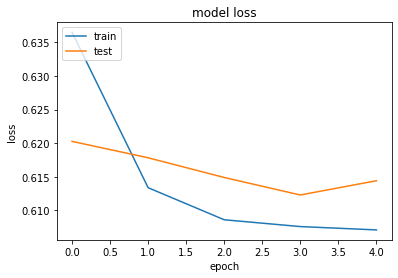

In [51]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

In [52]:
def recommend_movie(user_id, df, movie_df, movie2movie_encoded, user2user_encoded):
    # Let us get a user and see the top recommendations.
    movies_watched_by_user = df[df.userId == user_id]
    movies_not_watched = movie_df[
        ~movie_df["movieId"].isin(movies_watched_by_user.movieId.values)
    ]["movieId"]
    movies_not_watched = list(
        set(movies_not_watched).intersection(set(movie2movie_encoded.keys()))
    )
    movies_not_watched = [[movie2movie_encoded.get(x)] for x in movies_not_watched]
    user_encoder = user2user_encoded.get(user_id)
    user_movie_array = np.hstack(
        ([[user_encoder]] * len(movies_not_watched), movies_not_watched)
    )
    ratings = model.predict(user_movie_array).flatten()
    top_ratings_indices = ratings.argsort()[-10:][::-1]
    recommended_movie_ids = [
        movie_encoded2movie.get(movies_not_watched[x][0]) for x in top_ratings_indices
    ]

    print("Showing recommendations for user: {}".format(user_id))
    print("====" * 9)
    print("Movies with high ratings from user")
    print("----" * 8)
    top_movies_user = (
        movies_watched_by_user.sort_values(by="rating", ascending=False)
        .head(5)
        .movieId.values
    )
    movie_df_rows = movie_df[movie_df["movieId"].isin(top_movies_user)]
    for row in movie_df_rows.itertuples():
        print(row.title, ":", row.genres)

    print("----" * 8)
    print("Top 10 movie recommendations")
    print("----" * 8)
    recommended_movies = movie_df[movie_df["movieId"].isin(recommended_movie_ids)]
    for row in recommended_movies.itertuples():
        print(row.title, ":", row.genres)
        
    print("\n\n\n")

In [53]:
movie_df = pd.read_csv("data/movies.csv")

for _ in range(10):
    user_id = df.userId.sample(1).iloc[0]
    recommend_movie(user_id, df, movie_df, movie2movie_encoded, user2user_encoded)

Showing recommendations for user: 232
Movies with high ratings from user
--------------------------------
Gladiator (2000) : Action|Adventure|Drama
Memento (2000) : Mystery|Thriller
V for Vendetta (2006) : Action|Sci-Fi|Thriller|IMAX
Inception (2010) : Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX
Black Swan (2010) : Drama|Thriller
--------------------------------
Top 10 movie recommendations
--------------------------------
Silence of the Lambs, The (1991) : Crime|Horror|Thriller
Fargo (1996) : Comedy|Crime|Drama|Thriller
Lawrence of Arabia (1962) : Adventure|Drama|War
Apocalypse Now (1979) : Action|Drama|War
Goodfellas (1990) : Crime|Drama
Godfather: Part II, The (1974) : Crime|Drama
Full Metal Jacket (1987) : Drama|War
Amadeus (1984) : Drama
Boot, Das (Boat, The) (1981) : Action|Drama|War
Glory (1989) : Drama|War




Showing recommendations for user: 307
Movies with high ratings from user
--------------------------------
Army of Darkness (1993) : Action|Adventure|Comedy|Fantasy|Ho

Showing recommendations for user: 20
Movies with high ratings from user
--------------------------------
Wallace & Gromit: The Best of Aardman Animation (1996) : Adventure|Animation|Comedy
West Side Story (1961) : Drama|Musical|Romance
Muppets From Space (1999) : Children|Comedy
Bridget Jones's Diary (2001) : Comedy|Drama|Romance
Lord of the Rings: The Fellowship of the Ring, The (2001) : Adventure|Fantasy
--------------------------------
Top 10 movie recommendations
--------------------------------
Toy Story (1995) : Adventure|Animation|Children|Comedy|Fantasy
Casino (1995) : Crime|Drama
Twelve Monkeys (a.k.a. 12 Monkeys) (1995) : Mystery|Sci-Fi|Thriller
Star Wars: Episode IV - A New Hope (1977) : Action|Adventure|Sci-Fi
Schindler's List (1993) : Drama|War
Star Wars: Episode V - The Empire Strikes Back (1980) : Action|Adventure|Sci-Fi
Goodfellas (1990) : Crime|Drama
Godfather: Part II, The (1974) : Crime|Drama
American History X (1998) : Crime|Drama
Fight Club (1999) : Action|Crime|Dr

# Matrix Factorization

In [54]:
#Just taking the required columns
ratings = ratings[['userId', 'movieId','rating']]

In [55]:
# Checking if the user has rated the same movie twice, in that case we just take max of them
ratings_df = ratings.groupby(['userId','movieId']).aggregate(np.max)

In [56]:
#Getting the percentage count of each rating value 
count_ratings = ratings.groupby('rating').count()
count_ratings['perc_total']=round(count_ratings['userId']*100/count_ratings['userId'].sum(),1)

In [57]:
#reading the movies dataset
movie_list = pd.read_csv('data/movies.csv')

In [58]:
# insepcting the movie list dataframe
movie_list.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [59]:
# reading the tags datast
tags = pd.read_csv('data/tags.csv')

In [60]:
# inspecting various genres
genres = movie_list['genres']

In [61]:
genre_list = ""
for index,row in movie_list.iterrows():
        genre_list += row.genres + "|"
#split the string into a list of values
genre_list_split = genre_list.split('|')
#de-duplicate values
new_list = list(set(genre_list_split))
#remove the value that is blank
new_list.remove('')
#inspect list of genres
new_list

['Thriller',
 'Horror',
 '(no genres listed)',
 'Mystery',
 'Fantasy',
 'Musical',
 'Comedy',
 'Adventure',
 'Animation',
 'Action',
 'Documentary',
 'Drama',
 'Sci-Fi',
 'Children',
 'Crime',
 'War',
 'Western',
 'Film-Noir',
 'IMAX',
 'Romance']

In [62]:
#Enriching the movies dataset by adding the various genres columns.
movies_with_genres = movie_list.copy()

for genre in new_list :
    movies_with_genres[genre] = movies_with_genres.apply(lambda _:int(genre in _.genres), axis = 1)

In [63]:
#Calculating the sparsity
no_of_users = len(ratings['userId'].unique())
no_of_movies = len(ratings['movieId'].unique())

sparsity = round(1.0 - len(ratings)/(1.0*(no_of_movies*no_of_users)),3)
print(sparsity)

0.983


In [64]:
# Finding the average rating for movie and the number of ratings for each movie
avg_movie_rating = pd.DataFrame(ratings.groupby('movieId')['rating'].agg(['mean','count']))
# avg_movie_rating['movieId']= avg_movie_rating.index

In [65]:
# inspecting the average movie rating data frame
avg_movie_rating.head()

,mean,count
movieId,,
1,3.920930,215
2,3.431818,110
3,3.259615,52
4,2.357143,7
5,3.071429,49


In [66]:
#calculate the percentile count. It gives the no of ratings at least 70% of the movies have
np.percentile(avg_movie_rating['count'],70)

7.0

In [67]:
#Get the average movie rating across all movies 
avg_rating_all=ratings['rating'].mean()
avg_rating_all
#set a minimum threshold for number of reviews that the movie has to have
min_reviews=30
min_reviews
movie_score = avg_movie_rating.loc[avg_movie_rating['count']>min_reviews]
movie_score.head()

,mean,count
movieId,,
1,3.920930,215
2,3.431818,110
3,3.259615,52
5,3.071429,49
6,3.946079,102


In [68]:
#create a function for weighted rating score based off count of reviews
def weighted_rating(x, m=min_reviews, C=avg_rating_all):
    v = x['count']
    R = x['mean']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [69]:
#Calculating the weighted score for each movie
movie_score['weighted_score'] = movie_score.apply(weighted_rating, axis=1)
movie_score.head()

,mean,count,weighted_score
movieId,,,
1,3.920930,215,3.869578
2,3.431818,110,3.446762
3,3.259615,52,3.348131
5,3.071429,49,3.234768
6,3.946079,102,3.845051


In [70]:
#join movie details to movie ratings
movies_with_genres.index.name = None#.drop(columns=[])#, axis = 1)
movies_with_genres = movies_with_genres.rename_axis(None) 
movie_score = pd.merge(movie_score,movies_with_genres,on='movieId')
#movie_score = movie_score.index.name = NULL
#join movie links to movie ratings
#movie_score = pd.merge(movie_score,links,on='movieId')
movie_score.head()

,movieId,mean,count,weighted_score,title,genres,Thriller,Horror,(no genres listed),Mystery,...,Documentary,Drama,Sci-Fi,Children,Crime,War,Western,Film-Noir,IMAX,Romance
0,1,3.920930,215,3.869578,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2,3.431818,110,3.446762,Jumanji (1995),Adventure|Children|Fantasy,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,3,3.259615,52,3.348131,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,5,3.071429,49,3.234768,Father of the Bride Part II (1995),Comedy,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6,3.946079,102,3.845051,Heat (1995),Action|Crime|Thriller,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [71]:
#list top scored movies over the whole range of movies
pd.DataFrame(movie_score.sort_values(['weighted_score'],ascending=False)[['title','count','mean','weighted_score','genres']][:10])

,title,count,mean,weighted_score,genres
82,"Shawshank Redemption, The (1994)",317,4.429022,4.348838,Crime|Drama
181,"Godfather, The (1972)",192,4.289062,4.182643,Crime|Drama
474,Fight Club (1999),218,4.272936,4.179624,Action|Crime|Drama|Thriller
66,Star Wars: Episode IV - A New Hope (1977),251,4.231076,4.153191,Action|Adventure|Sci-Fi
24,"Usual Suspects, The (1995)",204,4.237745,4.143362,Crime|Mystery|Thriller
129,Schindler's List (1993),220,4.225000,4.138187,Drama|War
76,Pulp Fiction (1994),307,4.197068,4.135153,Comedy|Crime|Drama|Thriller
227,Star Wars: Episode V - The Empire Strikes Back...,211,4.215640,4.126750,Action|Adventure|Sci-Fi
429,"Matrix, The (1999)",278,4.192446,4.125152,Action|Sci-Fi|Thriller
244,"Godfather: Part II, The (1974)",129,4.259690,4.116646,Crime|Drama


In [72]:
# Gives the best movies according to genre based on weighted score which is calculated using IMDB formula
def best_movies_by_genre(genre,top_n):
    return pd.DataFrame(movie_score.loc[(movie_score[genre]==1)].sort_values(['weighted_score'],ascending=False)[['title','count','mean','weighted_score']][:top_n])

In [73]:
#run function to return top recommended movies by genre
best_movies_by_genre('Musical',10)  

,title,count,mean,weighted_score
98,"Lion King, The (1994)",172,3.941860,3.876469
182,Singin' in the Rain (1952),47,4.074468,3.851256
208,Willy Wonka & the Chocolate Factory (1971),119,3.873950,3.798971
202,"Sound of Music, The (1965)",64,3.937500,3.798369
190,My Fair Lady (1964),35,4.042857,3.793026
191,"Wizard of Oz, The (1939)",92,3.880435,3.787268
199,Mary Poppins (1964),71,3.887324,3.772740
445,"South Park: Bigger, Longer and Uncut (1999)",76,3.861842,3.759875
141,Aladdin (1992),183,3.792350,3.751393
243,"Blues Brothers, The (1980)",84,3.809524,3.728480


In [74]:
# Creating a data frame that has user ratings accross all movies in form of matrix used in matrix factorisation
ratings_df = pd.pivot_table(ratings, index='userId', columns='movieId', aggfunc=np.max)

In [75]:
#merging ratings and movies dataframes
ratings_movies = pd.merge(ratings,movie_list, on = 'movieId')

In [76]:
#Gets the other top 10 movies which are watched by the people who saw this particular movie
def get_other_movies(movie_name):
    #get all users who watched a specific movie
    df_movie_users_series = ratings_movies.loc[ratings_movies['title']==movie_name]['userId']
    #convert to a data frame
    df_movie_users = pd.DataFrame(df_movie_users_series,columns=['userId'])
    #get a list of all other movies watched by these users
    other_movies = pd.merge(df_movie_users,ratings_movies,on='userId')
    #get a list of the most commonly watched movies by these other user
    other_users_watched = pd.DataFrame(other_movies.groupby('title')['userId'].count()).sort_values('userId',ascending=False)
    other_users_watched['perc_who_watched'] = round(other_users_watched['userId']*100/other_users_watched['userId'][0],1)
    return other_users_watched[:10]

In [77]:
get_other_movies('Gone Girl (2014)')

,userId,perc_who_watched
title,,
Gone Girl (2014),37,100.0
Fight Club (1999),34,91.9
"Shawshank Redemption, The (1994)",30,81.1
"Matrix, The (1999)",30,81.1
Inception (2010),30,81.1
Forrest Gump (1994),28,75.7
Django Unchained (2012),27,73.0
"Dark Knight, The (2008)",26,70.3
"Silence of the Lambs, The (1991)",26,70.3


ML

In [78]:
from sklearn.neighbors import NearestNeighbors
avg_movie_rating.head()

,mean,count
movieId,,
1,3.920930,215
2,3.431818,110
3,3.259615,52
4,2.357143,7
5,3.071429,49


In [79]:
movie_plus_10_ratings = avg_movie_rating.loc[avg_movie_rating['count']>=10]
print(len(movie_plus_10_ratings))

2269


In [80]:
movie_plus_10_ratings

,mean,count
movieId,,
1,3.920930,215
2,3.431818,110
3,3.259615,52
5,3.071429,49
6,3.946079,102
...,...,...
174055,3.423077,13
176371,3.805556,18
177765,3.538461,13


In [81]:
filtered_ratings = pd.merge(movie_plus_10_ratings, ratings, on="movieId")
len(filtered_ratings)

81116

In [82]:
movie_wide = filtered_ratings.pivot(index = 'movieId', columns = 'userId', values = 'rating').fillna(0)
movie_wide.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,5.0


In [83]:
#specify model parameters
model_knn = NearestNeighbors(metric='cosine',algorithm='brute')
#fit model to the data set
model_knn.fit(movie_wide)

NearestNeighbors(algorithm='brute', metric='cosine')

In [84]:
#Gets the top 10 nearest neighbours got the movie
def print_similar_movies(query_index) :
    #get the list of user ratings for a specific userId
    query_index_movie_ratings = movie_wide.loc[query_index,:].values.reshape(1,-1)
    #get the closest 10 movies and their distances from the movie specified
    distances,indices = model_knn.kneighbors(query_index_movie_ratings,n_neighbors = 11) 
    #write a loop that prints the similar movies for a specified movie.
    for i in range(0,len(distances.flatten())):
        #get the title of the random movie that was chosen
        get_movie = movie_list.loc[movie_list['movieId']==query_index]['title']
        #for the first movie in the list i.e closest print the title
        if i==0:
            print('Recommendations for {0}:\n'.format(get_movie))
        else :
            #get the indiciees for the closest movies
            indices_flat = indices.flatten()[i]
            #get the title of the movie
            get_movie = movie_list.loc[movie_list['movieId']==movie_wide.iloc[indices_flat,:].name]['title']
            #print the movie
            print('{0}: {1}, with distance of {2}:'.format(i,get_movie,distances.flatten()[i]))

In [85]:
print_similar_movies(112552)

Recommendations for 21857    Whiplash (2014)
Name: title, dtype: object:

1: 20679    Her (2013)
Name: title, dtype: object, with distance of 0.41318631172180176:
2: 21759    Birdman: Or (The Unexpected Virtue of Ignoranc...
Name: title, dtype: object, with distance of 0.4433087706565857:
3: 21167    Grand Budapest Hotel, The (2014)
Name: title, dtype: object, with distance of 0.4705390930175781:
4: 21859    Gone Girl (2014)
Name: title, dtype: object, with distance of 0.47164613008499146:
5: 21199    Interstellar (2014)
Name: title, dtype: object, with distance of 0.47652482986450195:
6: 22595    Ex Machina (2015)
Name: title, dtype: object, with distance of 0.5219020843505859:
7: 20651    Wolf of Wall Street, The (2013)
Name: title, dtype: object, with distance of 0.5246250033378601:
8: 25053    Mad Max: Fury Road (2015)
Name: title, dtype: object, with distance of 0.5503472089767456:
9: 31752    The Revenant (2015)
Name: title, dtype: object, with distance of 0.5594412088394165:
10:

In [86]:
#Getting the movies list with only genres like Musical and other such columns
movie_content_df_temp = movies_with_genres.copy()
movie_content_df_temp.set_index('movieId')
movie_content_df = movie_content_df_temp.drop(columns = ['movieId','title','genres'])
#movie_content_df = movie_content_df.as_matrix()
movie_content_df

,Thriller,Horror,(no genres listed),Mystery,Fantasy,Musical,Comedy,Adventure,Animation,Action,Documentary,Drama,Sci-Fi,Children,Crime,War,Western,Film-Noir,IMAX,Romance
0,0,0,0,0,1,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62418,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
62419,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
62420,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
62421,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [87]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(movie_content_df,movie_content_df)

In [88]:
#create a series of the movie id and title
indicies = pd.Series(movie_content_df_temp.index, movie_content_df_temp['title'])
indicies 

title
Toy Story (1995)                          0
Jumanji (1995)                            1
Grumpier Old Men (1995)                   2
Waiting to Exhale (1995)                  3
Father of the Bride Part II (1995)        4
                                      ...  
We (2018)                             62418
Window of the Soul (2001)             62419
Bad Poems (2018)                      62420
A Girl Thing (2001)                   62421
Women of Devil's Island (1962)        62422
Length: 62423, dtype: int64

In [89]:
#Gets the top 10 similar movies based on the content
def get_similar_movies_based_on_content(movie_index) :
    sim_scores = list(enumerate(cosine_sim[movie_index]))
    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
   
    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[0:11]
    print(sim_scores)
    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]
    print(movie_indices)
    similar_movies = pd.DataFrame(movie_content_df_temp[['title','genres']].iloc[movie_indices])
    return similar_movies

In [90]:
indicies["Skyfall (2012)"]

18337

In [91]:
get_similar_movies_based_on_content(19338)

[(5270, 3.0), (6247, 3.0), (6809, 3.0), (7923, 3.0), (10802, 3.0), (10890, 3.0), (11561, 3.0), (11948, 3.0), (12751, 3.0), (13285, 3.0), (13460, 3.0)]
[5270, 6247, 6809, 7923, 10802, 10890, 11561, 11948, 12751, 13285, 13460]


,title,genres
5270,Star Wars: Episode II - Attack of the Clones (...,Action|Adventure|Sci-Fi|IMAX
6247,"Matrix Reloaded, The (2003)",Action|Adventure|Sci-Fi|Thriller|IMAX
6809,"Matrix Revolutions, The (2003)",Action|Adventure|Sci-Fi|Thriller|IMAX
7923,Spider-Man 2 (2004),Action|Adventure|Sci-Fi|IMAX
10802,Poseidon (2006),Action|Adventure|Thriller|IMAX
10890,Superman Returns (2006),Action|Adventure|Sci-Fi|IMAX
11561,Spider-Man 3 (2007),Action|Adventure|Sci-Fi|Thriller|IMAX
11948,Beowulf (2007),Action|Adventure|Animation|Fantasy|IMAX
12751,Madagascar: Escape 2 Africa (2008),Action|Adventure|Animation|Children|Comedy|IMAX
13285,Star Trek (2009),Action|Adventure|Sci-Fi|IMAX


In [92]:
#get ordered list of movieIds
item_indices = pd.DataFrame(sorted(list(set(ratings['movieId']))),columns=['movieId'])
#add in data frame index value to data frame
item_indices['movie_index']=item_indices.index
#inspect data frame
item_indices.head()


,movieId,movie_index
0,1,0
1,2,1
2,3,2
3,4,3
4,5,4


In [93]:
#get ordered list of movieIds
user_indices = pd.DataFrame(sorted(list(set(ratings['userId']))),columns=['userId'])
#add in data frame index value to data frame
user_indices['user_index']=user_indices.index
#inspect data frame
user_indices.head()

,userId,user_index
0,1,0
1,2,1
2,3,2
3,4,3
4,5,4


In [94]:
#join the movie indices
df_with_index = pd.merge(ratings,item_indices,on='movieId')
#join the user indices
df_with_index=pd.merge(df_with_index,user_indices,on='userId')
#inspec the data frame
df_with_index.head()

,userId,movieId,rating,movie_index,user_index
0,1,1,4.0,0,0
1,1,3,4.0,2,0
2,1,6,4.0,5,0
3,1,47,5.0,43,0
4,1,50,5.0,46,0


In [95]:
#import train_test_split module
from sklearn.model_selection import train_test_split
#take 80% as the training set and 20% as the test set
df_train, df_test= train_test_split(df_with_index,test_size=0.2)
print(len(df_train))
print(len(df_test))

80668
20168


In [96]:
n_users = ratings.userId.unique().shape[0]
n_items = ratings.movieId.unique().shape[0]
print(n_users)
print(n_items)

610
9724


In [97]:
#Create two user-item matrices, one for training and another for testing
train_data_matrix = np.zeros((n_users, n_items))
    #for every line in the data
for line in df_train.itertuples():
    #set the value in the column and row to 
    #line[1] is userId, line[2] is movieId and line[3] is rating, line[4] is movie_index and line[5] is user_index
    train_data_matrix[line[5], line[4]] = line[3]
train_data_matrix.shape

(610, 9724)

In [98]:
#Create two user-item matrices, one for training and another for testing
test_data_matrix = np.zeros((n_users, n_items))
    #for every line in the data
for line in df_test[:1].itertuples():
    #set the value in the column and row to 
    #line[1] is userId, line[2] is movieId and line[3] is rating, line[4] is movie_index and line[5] is user_index
    #print(line[2])
    test_data_matrix[line[5], line[4]] = line[3]
    #train_data_matrix[line['movieId'], line['userId']] = line['rating']
test_data_matrix.shape

(610, 9724)

In [99]:
pd.DataFrame(train_data_matrix).head()

,0,1,2,3,4,5,6,7,8,9,...,9714,9715,9716,9717,9718,9719,9720,9721,9722,9723
0,4.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [100]:
df_train['rating'].max()

5.0

In [101]:
from sklearn.metrics import mean_squared_error
from math import sqrt
def rmse(prediction, ground_truth):
    #select prediction values that are non-zero and flatten into 1 array
    prediction = prediction[ground_truth.nonzero()].flatten() 
    #select test values that are non-zero and flatten into 1 array
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    #return RMSE between values
    return sqrt(mean_squared_error(prediction, ground_truth))

In [103]:
import pickle
#import matrix_factorization_utilities
import scipy.sparse as sp
from scipy.sparse.linalg import svds

In [104]:
#Calculate the rmse sscore of SVD using different values of k (latent features)
rmse_list = []
for i in [1,2,5,20,40,60,100,200]:
    #apply svd to the test data
    u,s,vt = svds(train_data_matrix,k=i)
    #get diagonal matrix
    s_diag_matrix=np.diag(s)
    #predict x with dot product of u s_diag and vt
    X_pred = np.dot(np.dot(u,s_diag_matrix),vt)
    #calculate rmse score of matrix factorisation predictions
    rmse_score = rmse(X_pred,test_data_matrix)
    rmse_list.append(rmse_score)
    print("Matrix Factorisation with " + str(i) +" latent features has a RMSE of " + str(rmse_score))

Matrix Factorisation with 1 latent features has a RMSE of 3.329598802677928
Matrix Factorisation with 2 latent features has a RMSE of 3.3134439518310734
Matrix Factorisation with 5 latent features has a RMSE of 4.032808544530305
Matrix Factorisation with 20 latent features has a RMSE of 3.6948919994918614
Matrix Factorisation with 40 latent features has a RMSE of 3.983768657907574
Matrix Factorisation with 60 latent features has a RMSE of 4.043667158290669
Matrix Factorisation with 100 latent features has a RMSE of 3.948036531299684
Matrix Factorisation with 200 latent features has a RMSE of 4.005530048207376


For DL

In [142]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM,Bidirectional,GRU,SimpleRNN

In [122]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j + 1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j + 1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j + 1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [125]:
# load dataset
dataset = read_csv('data/combined.csv',nrows=1000, header=0, index_col=0)
values = dataset.values

In [126]:
print("values ",values)

values  [[2.100e+01 1.000e+00 3.000e+00 ... 1.700e+01 1.995e+03 9.140e+03]
 [4.700e+01 1.000e+00 5.000e+00 ... 3.000e+01 1.995e+03 9.140e+03]
 [1.079e+03 1.000e+00 3.000e+00 ... 3.800e+01 1.988e+03 9.140e+03]
 ...
 [1.750e+02 1.000e+00 4.000e+00 ... 1.200e+01 1.995e+03 9.564e+03]
 [1.850e+02 2.000e+00 4.000e+00 ... 6.000e+00 1.995e+03 9.564e+03]
 [1.860e+02 2.000e+00 3.500e+00 ... 3.000e+00 1.995e+03 9.564e+03]]


In [127]:
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[0, 1, 2, 4, 5, 6, 7]], axis=1, inplace=True)
print(reframed.head())

   var4(t-1)  var2(t)  var3(t)   var4(t)   var5(t)   var6(t)  var7(t)
1   0.248947      0.0     1.00  0.248947  0.180124  0.983051      0.0
2   0.248947      0.0     0.50  0.248947  0.229814  0.864407      0.0
3   0.248947      0.0     0.75  0.248947  0.571429  0.915253      0.0
4   0.248947      0.0     0.50  0.248947  0.099379  0.983051      0.0
5   0.248947      0.0     1.00  0.248947  0.180124  0.983051      0.0


In [128]:
# split into train and test sets
values = reframed.values
n_train_hours = 700
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(700, 1, 6) (700,) (299, 1, 6) (299,)


# LSTM

In [129]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

In [130]:
history = model.fit(train_X, train_y, epochs=20, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Epoch 1/20
10/10 - 13s - loss: 0.8082 - val_loss: 0.7822
Epoch 2/20
10/10 - 0s - loss: 0.7069 - val_loss: 0.6716
Epoch 3/20
10/10 - 0s - loss: 0.5994 - val_loss: 0.5519
Epoch 4/20
10/10 - 0s - loss: 0.4819 - val_loss: 0.4188
Epoch 5/20
10/10 - 0s - loss: 0.3504 - val_loss: 0.2681
Epoch 6/20
10/10 - 0s - loss: 0.2032 - val_loss: 0.1125
Epoch 7/20
10/10 - 0s - loss: 0.1227 - val_loss: 0.0986
Epoch 8/20
10/10 - 0s - loss: 0.1332 - val_loss: 0.0966
Epoch 9/20
10/10 - 0s - loss: 0.1245 - val_loss: 0.0874
Epoch 10/20
10/10 - 0s - loss: 0.1145 - val_loss: 0.0848
Epoch 11/20
10/10 - 0s - loss: 0.1078 - val_loss: 0.0810
Epoch 12/20
10/10 - 0s - loss: 0.1018 - val_loss: 0.0772
Epoch 13/20
10/10 - 0s - loss: 0.0978 - val_loss: 0.0739
Epoch 14/20
10/10 - 0s - loss: 0.0928 - val_loss: 0.0709
Epoch 15/20
10/10 - 0s - loss: 0.0874 - val_loss: 0.0676
Epoch 16/20
10/10 - 11s - loss: 0.0824 - val_loss: 0.0644
Epoch 17/20
10/10 - 0s - loss: 0.0774 - val_loss: 0.0612
Epoch 18/20
10/10 - 0s - loss: 0.0727 

In [131]:
import matplotlib.pyplot as plt
import numpy as np

# pyplot.plot(history.history['loss'], label='train')
# pyplot.plot(history.history['val_loss'], label='test')
print("LOST :", history.history['loss'])
ScoreTrain = np.array(history.history['loss'])
print("ScoreTrain",ScoreTrain)
ScoreTrain1 = (100.0-ScoreTrain)
print("ScoreTrain1 ", ScoreTrain1)

LOST : [0.8082056641578674, 0.7068571448326111, 0.5993919372558594, 0.48188507556915283, 0.35035812854766846, 0.20316028594970703, 0.12268789112567902, 0.13321007788181305, 0.12445767968893051, 0.11450927704572678, 0.10782969743013382, 0.1018434688448906, 0.09776944667100906, 0.09280187636613846, 0.08740448206663132, 0.08239053189754486, 0.07739052176475525, 0.07265225797891617, 0.06760167330503464, 0.06310656666755676]
ScoreTrain [0.80820566 0.70685714 0.59939194 0.48188508 0.35035813 0.20316029
 0.12268789 0.13321008 0.12445768 0.11450928 0.1078297  0.10184347
 0.09776945 0.09280188 0.08740448 0.08239053 0.07739052 0.07265226
 0.06760167 0.06310657]
ScoreTrain1  [99.19179434 99.29314286 99.40060806 99.51811492 99.64964187 99.79683971
 99.87731211 99.86678992 99.87554232 99.88549072 99.8921703  99.89815653
 99.90223055 99.90719812 99.91259552 99.91760947 99.92260948 99.92734774
 99.93239833 99.93689343]


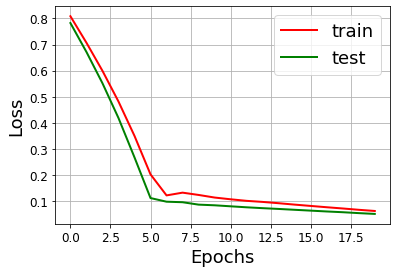

In [132]:
t = np.arange(0, 110, 10)
fig, ax = plt.subplots()
ax.plot( history.history['loss'], color='r',  lw=2.0, label='train')
ax.plot(history.history['val_loss'], color='g', lw=2.0, label='test')
plt.ylabel('Loss', fontsize = 18)
plt.xlabel('Epochs', fontsize = 18)
plt.legend(loc='best',fontsize = 18)
ax.grid(True)
ticklines = ax.get_xticklines() + ax.get_yticklines()
gridlines = ax.get_xgridlines()
ticklabels = ax.get_xticklabels() + ax.get_yticklabels()

for line in ticklines:
    line.set_linewidth(3)

for line in gridlines:
    line.set_linestyle('-')

for line in gridlines:
    line.set_linestyle('-')

for label in ticklabels:
    label.set_color('black')
    label.set_fontsize('large')

plt.show()

No handles with labels found to put in legend.


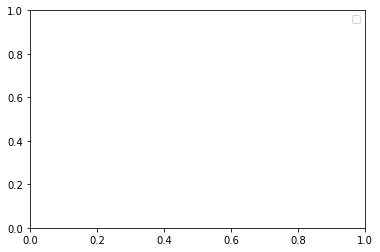

In [133]:
# pyplot.plot(history.history['acc'], label='acc')
# pyplot.plot(history.history['val_acc'], label='val_acc')
pyplot.legend()
pyplot.show()


In [134]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

print("yhat", yhat.shape)
print("test_X", test_X.shape)
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
scaler = MinMaxScaler(feature_range=(0, 1)).fit(inv_yhat)
print("inv_yhat", inv_yhat)
print("inv_yhat", inv_yhat.shape)
inv_yhat = scaler.inverse_transform(inv_yhat)
print("After inv_yhat", inv_yhat)
print("After inv_yhat", inv_yhat.shape)

inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

yhat (299, 1)
test_X (299, 6)
inv_yhat [[0.95295733 0.125      0.8333334  0.00280899 0.06832299 0.9491501 ]
 [1.0443518  0.4375     0.6875     0.00983146 0.5714286  0.9322014 ]
 [0.9847633  0.1875     0.6875     0.00421348 0.31677017 0.9491501 ]
 ...
 [0.9457836  0.         0.75       0.00629862 0.06832299 0.9830513 ]
 [0.94262224 0.0625     0.75       0.01400173 0.0310559  0.9830513 ]
 [0.91703624 0.0625     0.625      0.01400173 0.01242236 0.9830513 ]]
inv_yhat (299, 6)
After inv_yhat [[1.12437928e+00 9.37500000e-02 8.33333373e-01 2.21089533e-04
  6.83229864e-02 9.49150085e-01]
 [1.16168964e+00 3.28125000e-01 6.87500000e-01 7.73813284e-04
  5.71428597e-01 9.32201385e-01]
 [1.13736355e+00 1.40625000e-01 6.87500000e-01 3.31634248e-04
  3.16770166e-01 9.49150085e-01]
 ...
 [1.12145066e+00 0.00000000e+00 7.50000000e-01 4.95750690e-04
  6.83229864e-02 9.83051300e-01]
 [1.12016010e+00 4.68750000e-02 7.50000000e-01 1.10204623e-03
  3.10559012e-02 9.83051300e-01]
 [1.10971498e+00 4.68750000e

For BiLSTM

In [181]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn import preprocessing

from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import GRU, LSTM
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model
from keras.utils.np_utils import to_categorical
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping
#from keras_tqdm import TQDMNotebookCallback

import re
import datetime

# Load datasets
ratings = pd.read_csv('data/ratings1.csv')
print ('Shape of the ratings data frame:', ratings.shape)

tags = pd.read_csv('data/tags.csv')
print ('Shape of the tags data frame:', tags.shape)

movies = pd.read_csv('data/movies.csv')
print ('Shape of the movies data frame:', movies.shape)

#Will take
tags = tags.sample(frac=0.2)
ratings = ratings.sample(frac=0.2)

print ('Shape of the sampled ratings data frame:', ratings.shape)
print ('Shape of the sampled tags data frame:', tags.shape)
print ('Shape of the sampled movies data frame:', movies.shape)

Shape of the ratings data frame: (25000095, 4)
Shape of the tags data frame: (1093360, 4)
Shape of the movies data frame: (62423, 3)
Shape of the sampled ratings data frame: (5000019, 4)
Shape of the sampled tags data frame: (218672, 4)
Shape of the sampled movies data frame: (62423, 3)


In [182]:
ratings = ratings.drop(['timestamp'], axis=1)

In [183]:
data = pd.merge(ratings, tags, how='inner')
print ('Shape of the joint data frame:', data.shape)
print (data.head(n=5))

Shape of the joint data frame: (32932, 5)
   userId  movieId  rating                     tag   timestamp
0  137399    57532     0.5  Films that made me mad  1257949482
1  135039   119145     3.5                 offbeat  1428190827
2  100702     3186     3.0          Angelina Jolie  1294758975
3    3627     2959     4.5                violence  1286205189
4  111090   119126     3.0                    Gore  1440979799


In [184]:
for column in data.columns:
    print (column, data[column].nunique())

userId 4223
movieId 6617
rating 10
tag 9237
timestamp 32141


In [185]:
#Compute average ratings by tag
tagratings = pd.pivot_table(data, values=['rating'], columns=['tag'], aggfunc='mean')
tagratings

tag,"""The Hunter""","""damn dirty apes""","""found footage""","""retrofitted"" future",&suspense,'Erasing' effect,'Isreal' plot,'So How Did Lois Survive Date Nite?',007,007 (series),...,ziegfeld follies,zionism,zoe kazan,zombie,zombie apocalypse,zombie apocalyptic,zombies,Álex de la Iglesia,Британский,Про шпионов
rating,3.0,2.5,4.0,5.0,5.0,3.0,3.0,4.0,4.25,5.0,...,4.5,3.5,4.0,3.735294,4.0,4.0,3.674419,3.0,3.0,3.0


In [186]:
#Remove any special characters from tag
#Relabel ratings 
data['rating'] = data['rating'].apply(lambda x: 1 if x > 4 else 0)

#Delete special characters
data['tag'] = data['tag'].apply(lambda x: str(x))
data['tag'] = data['tag'].map(lambda x: re.sub(r'([^\s\w]|_)+', '', x))
data['tag'] = data['tag'].str.lower()

In [187]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['tag'])
sequences = tokenizer.texts_to_sequences(data['tag'])

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

pseq = pad_sequences(sequences)
pdseq = pd.DataFrame(pseq)

Found 7710 unique tokens.


In [188]:
#Convert timestamp in seconds to datetime format
data['timestamp'] = data['timestamp'].apply(lambda x: datetime.datetime.fromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S'))
data['timestamp'].astype('datetime64[ns]')

0       2009-11-11 19:54:42
1       2015-04-05 05:10:27
2       2011-01-11 20:46:15
3       2010-10-04 20:43:09
4       2015-08-31 05:39:59
                ...        
32927   2018-03-06 04:13:55
32928   2014-08-23 11:52:54
32929   2006-02-11 04:13:27
32930   2015-10-01 23:15:46
32931   2009-11-08 01:54:06
Name: timestamp, Length: 32932, dtype: datetime64[ns]

In [189]:
vectorizer = CountVectorizer(stop_words='english',decode_error='ignore', analyzer='word')
corpus = data['tag'].values
wordvec = vectorizer.fit_transform(corpus.ravel())
wordvec = wordvec.toarray()

words = vectorizer.get_feature_names()
print("number of words in plot summary: ", len(words))
pdwordvec = pd.DataFrame(wordvec,columns=words)

number of words in plot summary:  7532


In [190]:
embeddings_index = {}
f = open('glove.6B.100d.txt',encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

embedding_matrix = np.zeros((len(words), 100))
for i in range(len(words)):
    embedding_vector = embeddings_index.get(words[i])
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector
        
pdembedding = pd.DataFrame(embedding_matrix.T,columns=words)

Found 400000 word vectors.


In [191]:
# For deep learning with LSTM, we will only use word sequences
dpdata = pd.concat([data, pdseq], axis=1)

dpdata = dpdata.drop(['tag'], axis=1)
dpdata = dpdata.drop(['userId'], axis=1)
dpdata = dpdata.drop(['movieId'], axis=1)

In [192]:
dpdata.shape

(32932, 23)

In [193]:
train = dpdata[(dpdata['timestamp'] < '2016-08-01') ]
test = dpdata[(dpdata['timestamp'] >= '2016-08-01') ]

In [194]:
#remove timestamp as it won't be needed for modeling
train = train.drop(['timestamp'], axis=1)
test = test.drop(['timestamp'], axis=1)

In [195]:
#Define target and predictor variables
y_train = train['rating']
y_test = test['rating']
x_train = train.drop(['rating'], axis=1)
x_test = test.drop(['rating'], axis=1)

In [207]:
y_test_matrix = to_categorical(y_test)
y_train_matrix = to_categorical(y_train)
x_train_array = np.array(x_train)
x_test_array = np.array(x_test)

epochs = 20
lrate = 0.01
sgd = SGD(lr=lrate)
early_stopping = EarlyStopping(monitor='acc',patience=2)

model = Sequential()
model.add(Embedding(8000, 100, mask_zero=True, trainable=False))
model.add(Bidirectional(LSTM(10, return_sequences=False)))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, None, 100)         800000    
_________________________________________________________________
bidirectional_6 (Bidirection (None, 20)                8880      
_________________________________________________________________
dense_13 (Dense)             (None, 2)                 42        
Total params: 808,922
Trainable params: 8,922
Non-trainable params: 800,000
_________________________________________________________________


In [208]:
model.fit(x_train_array, y_train_matrix, validation_data=(x_test_array, y_test_matrix), epochs=5, batch_size=250)
# Final evaluation of the model
scores = model.evaluate(x_test_array, y_test_matrix, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/5
75/75 [==============================] - 4s 48ms/step - loss: 0.6688 - accuracy: 0.6314 - val_loss: 0.6577 - val_accuracy: 0.6383
Epoch 2/5
75/75 [==============================] - 2s 32ms/step - loss: 0.6570 - accuracy: 0.6337 - val_loss: 0.6548 - val_accuracy: 0.6383
Epoch 3/5
75/75 [==============================] - 2s 32ms/step - loss: 0.6556 - accuracy: 0.6337 - val_loss: 0.6540 - val_accuracy: 0.6383
Epoch 4/5
75/75 [==============================] - 2s 32ms/step - loss: 0.6547 - accuracy: 0.6337 - val_loss: 0.6536 - val_accuracy: 0.6383
Epoch 5/5
75/75 [==============================] - 3s 34ms/step - loss: 0.6540 - accuracy: 0.6337 - val_loss: 0.6533 - val_accuracy: 0.6383
Accuracy: 63.83%
